# Interpretable Recurrent Neural Network Video MNIST Demo

Dataset courtesty of github user [despoisj](https://github.com/despoisj) and his/her [LatentSpaceVisualization]( https://github.com/despoisj/LatentSpaceVisualization) project.

---

# Load Data and Visualize

4


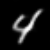

4


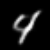

4


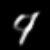

7


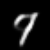

7


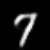

In [1]:
from IPython.display import display
import pickle
import pandas

[imgs, y] = pandas.read_pickle(open('LatentSpaceVisualization/Visuals/mnist_transitions.p', 'rb'))
for img, y_ in zip(imgs[:5], y[:5]):
    print(y_)
    display(img)

# Interactive Visualization

In [2]:
from ipywidgets import interact, fixed
import ipywidgets as widgets

@interact(imgs=fixed(imgs), y=fixed(y), i=widgets.IntSlider(min=0, max=len(y)-1, step=1))
def mnist_video(imgs, y, i):
    print(y[i])
    return imgs[i].resize(size=[128, 128])

# Vectorize Data Points

In [3]:
from keras.preprocessing.image import img_to_array
import numpy as np

X = np.array([img_to_array(img) for img in imgs]) / 255.
#X

Using TensorFlow backend.


# Define Keras Model

In [4]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=[50, 50, 1]))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(units=10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                184330    
Total params: 184,650
Trainable params: 184,650
Non-trainable params: 0
_________________________________________________________________


# Prediction

In [5]:
model.predict(X[:1])

array([[ 0.10227104,  0.09045028,  0.09651736,  0.09716552,  0.11310714,
         0.0922304 ,  0.0996783 ,  0.10810869,  0.09361213,  0.10685914]], dtype=float32)

# Preprocessing Labels

In [6]:
from keras.utils.np_utils import to_categorical

Y = to_categorical(y)
#Y

## Define Callback

In [7]:
from keras.callbacks import Callback

class HelloWorld(Callback):
    def on_train_begin(self, logs=None):
        print('Training has begun')

    def on_epoch_end(self, epoch, logs=None):
        print('Epoch ended')

# Fit the Model

In [8]:
history = model.fit(X, Y, validation_split=.1, callbacks=[HelloWorld()])

Train on 5400 samples, validate on 600 samples
Training has begun
Epoch 1/10
5400/5400 [==============================] - 5s - loss: 0.9304 - acc: 0.6933 - val_loss: 0.9469 - val_acc: 0.7183
Epoch 2/10
5400/5400 [==============================] - 5s - loss: 0.6384 - acc: 0.7878 - val_loss: 0.8488 - val_acc: 0.7250
Epoch 3/10
5400/5400 [==============================] - 5s - loss: 0.5369 - acc: 0.8207 - val_loss: 0.8256 - val_acc: 0.7417
Epoch 4/10
5400/5400 [==============================] - 5s - loss: 0.4570 - acc: 0.8459 - val_loss: 0.8326 - val_acc: 0.7383
Epoch 5/10
5400/5400 [==============================] - 5s - loss: 0.3898 - acc: 0.8693 - val_loss: 0.7782 - val_acc: 0.7567
Epoch 6/10
5400/5400 [==============================] - 5s - loss: 0.3433 - acc: 0.8843 - val_loss: 0.7179 - val_acc: 0.7650
Epoch 7/10
5400/5400 [==============================] - 5s - loss: 0.3036 - acc: 0.8969 - val_loss: 0.7814 - val_acc: 0.7450
Epoch 8/10
5400/5400 [==============================] - 5s 

# Learning Curves

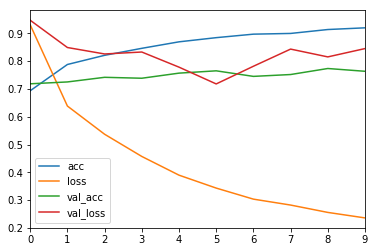

In [9]:
import pandas as pd
%matplotlib inline

pd.DataFrame(history.history).plot()

In [22]:
model.evaluate(X, Y)

5984/6000 [============================>.] - ETA: 0s

[0.26060509866476061, 0.91533333333333333]